<a href="https://colab.research.google.com/github/ankit7700/IPL-Win-Prediction-project/blob/main/ipl_win_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name - Ankit Choudhary

# IPL Analysis and M.L Modeling

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Machine Learning project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in Python, E.D.A, Statics & M.L to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided ipl dataset (2008-2019) containing information about various matches to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help you analyse various key points, aspects, and information about the IPL. 🎉

##About the Dataset

This data was gathered during (2008-2019) IPL Matches.
Data description is as follows;

Match Dataset:
1. id - Unique match ID
2. Season - match belong to which season
3. city - match host city
4. date - date of the match
5. team1, team2 - teams competing against each other
6. toss_winner - which team won the toss
7. toss_decision - decision of the team to bat or ball first
8. result - type of match result
9. dl_applied - is dl applyed in the match
10. winner - which team won the match
11. win_by_runs - match win by runs
12. win_by_wickets - match win by wickets
13. player_of_match - best player of the match
14. venue - host stadium information
15. umpire1,2,3 - umpire information

Delivery Dataset:

1. match_id - match id of the match
2. total_runs_x - 1 team runs
3. inning - 1 or 2 inning information
4. batting_team - batting team information
5. bowling_team - bowling team information
6. over - over information
7. ball - ball of the over information
8. batsman - batsman info.
9. non_striker - non_striker batsman info.
10. bowler - bowler info.
11. is_super_over - super over info.
12. wide, bye, legbye, noball, penalty, batsman, extra, total runs - runs information of batting team
13. player_dismissed - player out info.
14. dismissal_kind - mathod of player dismissed
15. fielder - fielder information

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**


**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# required important python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path1 = "/content/drive/MyDrive/Colab Notebooks/data science/module 6/assignment/deliveries.csv"
path2 = "/content/drive/MyDrive/Colab Notebooks/data science/module 6/assignment/matches.csv"


delivery = pd.read_csv(path1)
match = pd.read_csv(path2)

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:

print(f"No of Row's = {match.shape[0]}\nNo of Columns = {match.shape[1]}")

No of Row's = 756
No of Columns = 18


In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
print(f"No of Row's = {delivery.shape[0]}\nNo of Columns = {delivery.shape[1]}")

No of Row's = 179078
No of Columns = 21


In [ ]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match.drop(columns=['umpire3'], inplace=True)

In [ ]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
match.duplicated().sum()

0

In [ ]:
delivery.duplicated().sum()

23

In [ ]:
pd.DataFrame(delivery[delivery.duplicated()]).head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
delivery[(delivery['match_id']==221) & (delivery['inning']==1) & (delivery['over']==4) & (delivery['ball']==1)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:

# match.drop_duplicates(inplace=True)
delivery.drop_duplicates(inplace=True)

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(4), object(13)
memory usag

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [ ]:
match.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### What did you know about your dataset?

**Answer Here**

This dataset  contain information about various IPL Matches played during (2008-2019), including details like the teams, inning, overs, runs, players, and city.

1. match data consists of 18 columns and 756 rows. & delivery data consists of 21 columns and 179055 rows
2. In match dataset maximum columns are objective type. & In delivery dataset maximum columns are neumeric type.
3. There are some duplicated records in the delivery dataset which i removed.
4. There are some missing values in various columns.some of them are important which i use in evaluation after convert them.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(list(match.columns))
print(list(delivery.columns))

['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2']
['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']


In [ ]:
# Dataset Describe

match.describe(include='all')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


In [ ]:
delivery.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179055.000000,179055.000000,179055,179055,179055.000000,179055.000000,179055,179055,179055,179055.000000,...,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22615,22516,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1801.169758,1.482969,NaN,NaN,10.162916,3.615543,NaN,NaN,NaN,0.000452,...,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948,NaN,NaN,NaN
std,3471.116142,0.502075,NaN,NaN,5.677628,1.806869,NaN,NaN,NaN,0.021264,...,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

match.nunique()

id                 756
Season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
dtype: int64

In [ ]:
delivery.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [ ]:
df1 = delivery.copy()
df2 = match.copy()

## 3. ***Data Wrangling***

In [ ]:
total_score = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score = total_score[total_score['inning']==1]

<ipython-input-27-d4982eab3f1f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [ ]:
match = match.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,5,157


In [ ]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans'
]

In [ ]:
match['team1'] = match['team1'].replace('Delhi Daredevils','Delhi Capitals')
match['team2'] = match['team2'].replace('Delhi Daredevils','Delhi Capitals')
match['winner'] = match['winner'].replace('Delhi Daredevils','Delhi Capitals')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

match['team1'] = match['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['team2'] = match['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['winner'] = match['winner'].replace('Deccan Chargers','Sunrisers Hyderabad')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

match['team1'] = match['team1'].replace('Gujarat Lions','Gujarat Titans')
match['team2'] = match['team2'].replace('Gujarat Lions','Gujarat Titans')
match['winner'] = match['winner'].replace('Gujarat Lions','Gujarat Titans')
match['toss_winner'] = match['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')

In [ ]:
match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]
match = match[match['winner'].isin(teams)]
match = match[match['toss_winner'].isin(teams)]

In [ ]:
match.shape


(612, 19)

### What all manipulations have you done and insights you found?

I apply data wrangling operations on data  for exploratory data analysis and creat new featurews which required for EDA. All data wrangling steps are mention below

1. creat a mnew colum which show total score of first inning which rivel team chasing.
2. Add total score  column to match data
3. Chack various teams participating in different seasons. Found that some team names have changed and some teams are not playing now.
4. Change names of tems which change in later seasons for effective analysis.
5. Remove teams which not playing now.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,5,157
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,6,135
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,7,178


In [ ]:
match.nunique()

id                 612
Season              12
city                31
date               479
team1                9
team2                9
toss_winner          8
toss_decision        2
result               2
dl_applied           2
winner               9
win_by_runs         84
win_by_wickets      11
player_of_match    197
venue               40
umpire1             61
umpire2             64
match_id           612
total_runs         142
dtype: int64

#### Chart - 1

<Axes: ylabel='toss_decision'>

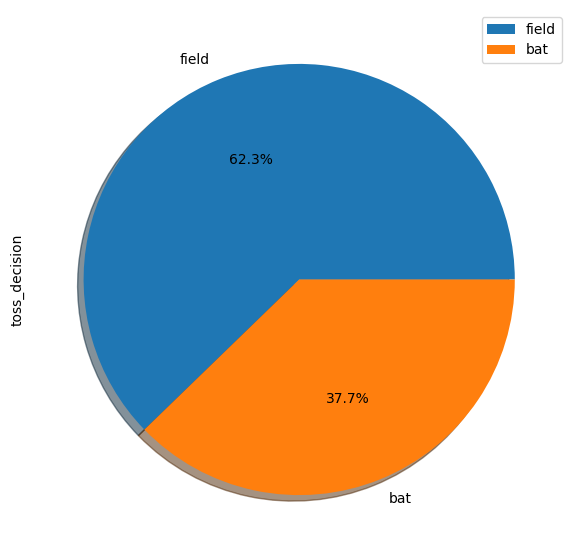

In [ ]:
plt.figure(figsize=(13,7))
match['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)

##### 1. Why did you pick the specific chart?


A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the % of different types of shows available in netflix. 69.1% of the data belongs to movies and 30.9% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2 - Top 10 Directors on Netflix


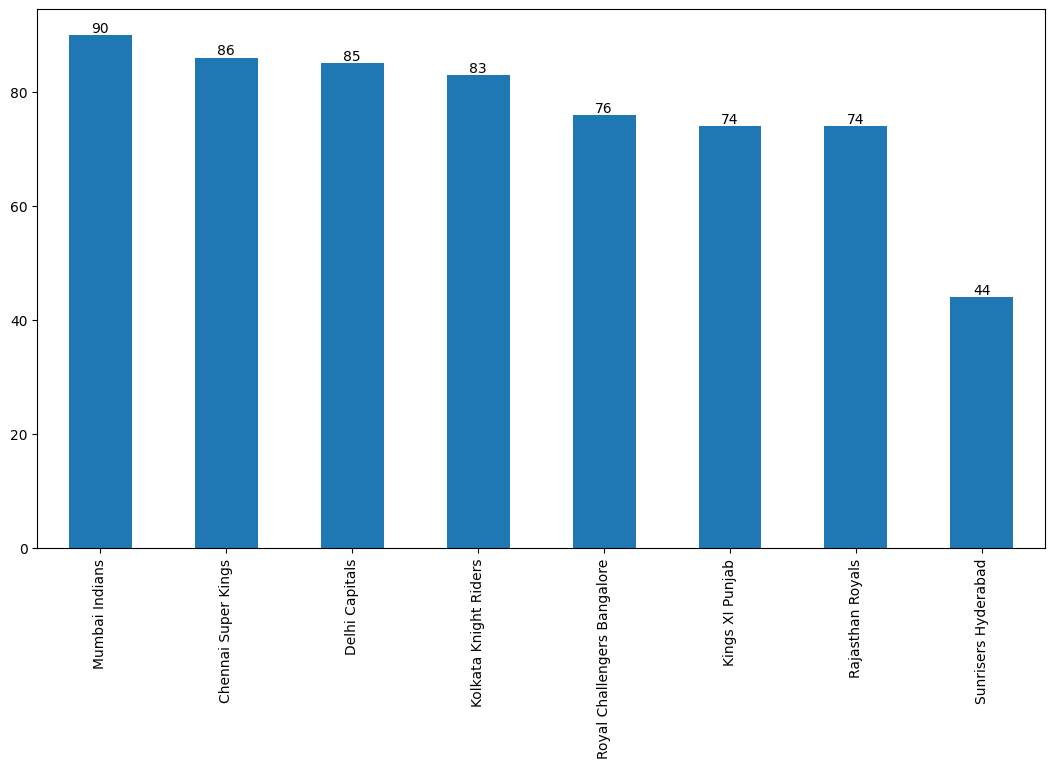

In [ ]:
plt.figure(figsize=(13,7))
a = match['toss_winner'].value_counts().plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 3 -

In [ ]:
(match['winner'] == match['toss_winner']).value_counts()

True     324
False    288
dtype: int64

<Axes: >

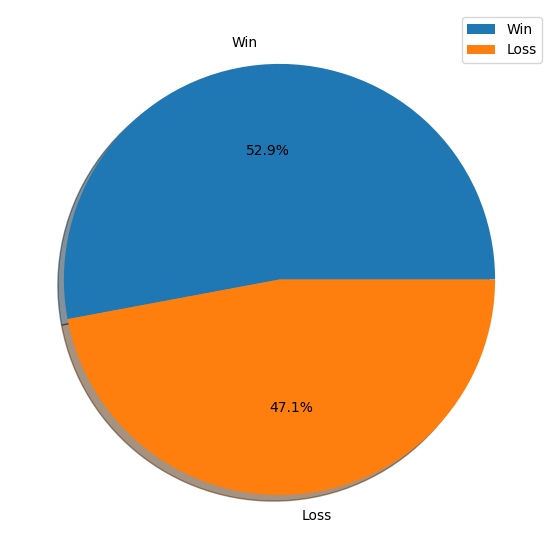

In [ ]:
plt.figure(figsize=(13,7))
(match['winner'] == match['toss_winner']).value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Win', 'Loss'], legend=True, shadow=True)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 4 -

In [ ]:


print('field',((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'field')).value_counts())
print('bat',((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'bat')).value_counts())

field False    395
True     217
dtype: int64
bat False    505
True     107
dtype: int64


<Axes: title={'center': 'Toss Decision - Bat'}>

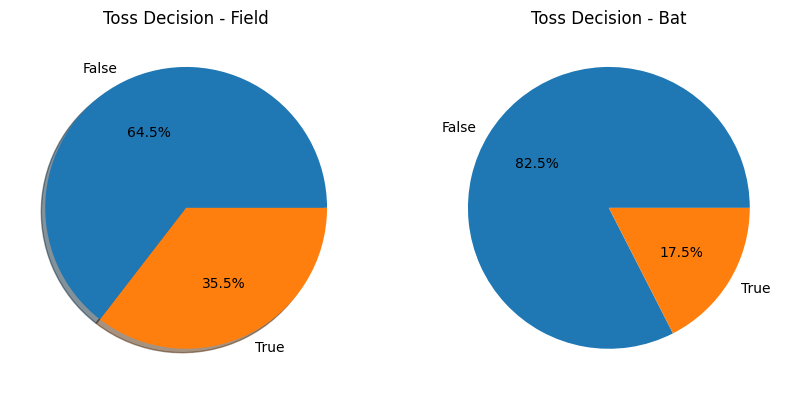

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Toss Decision - Field')
((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'field')).value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', shadow=True)

axs[1].set_title('Toss Decision - Bat')
((match['winner'] == match['toss_winner']) & (match['toss_decision'] == 'bat')).value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 5 -

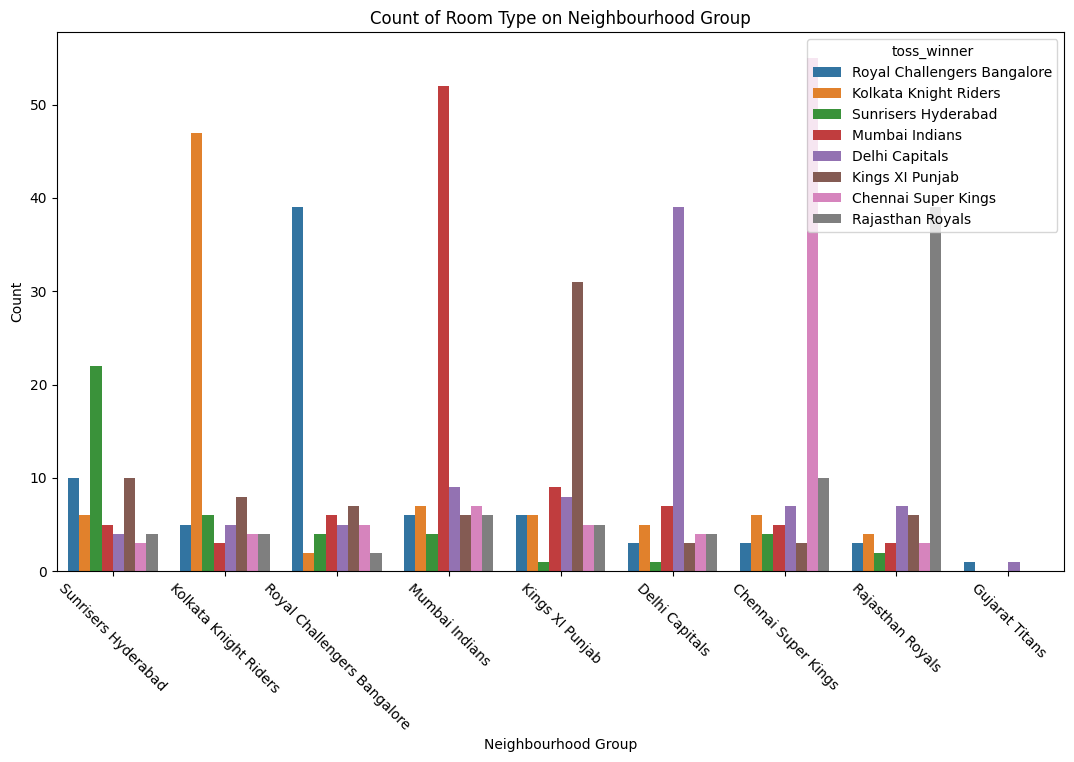

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(data=match, x='winner', hue='toss_winner')
plt.xticks(rotation=-45)
plt.title("Count of Room Type on Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 6 -

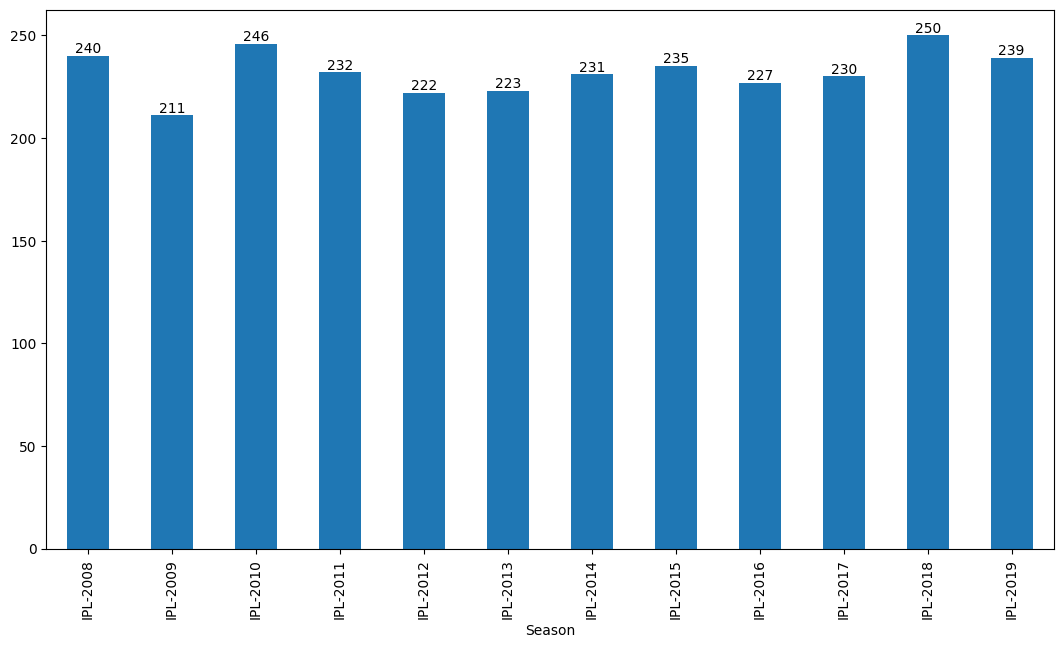

In [ ]:
plt.figure(figsize=(13,7))
a = match.groupby('Season')['total_runs'].max().plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 7 -

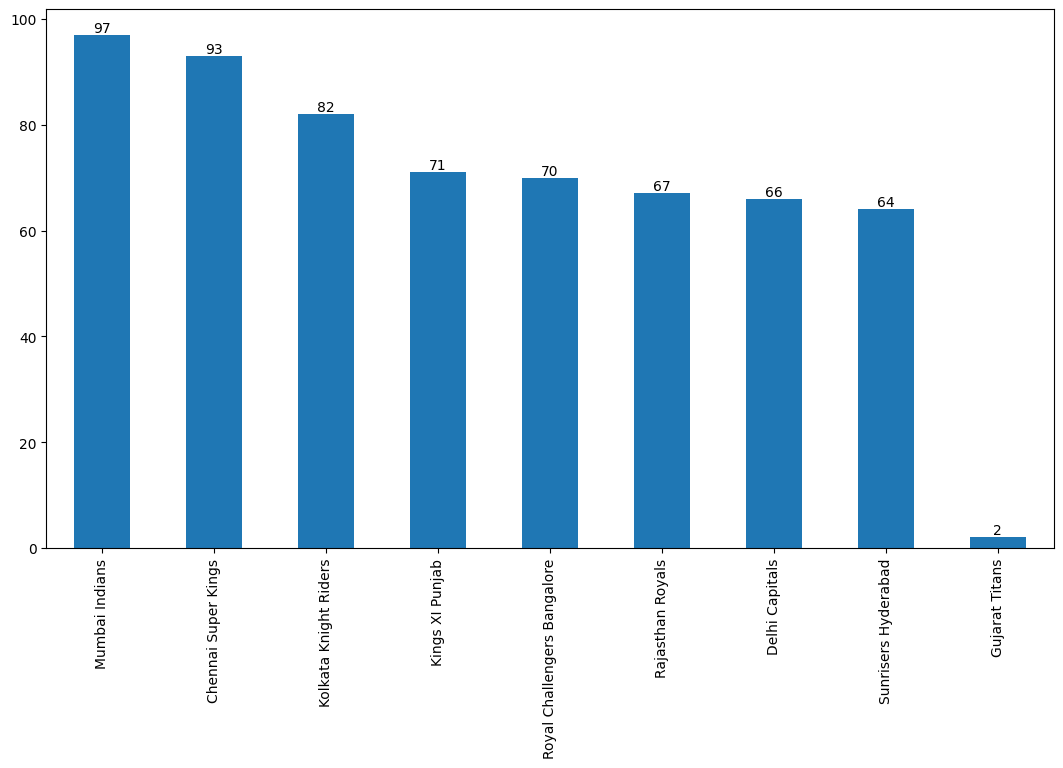

In [ ]:
plt.figure(figsize=(13,7))
a = match['winner'].value_counts().plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 8 -

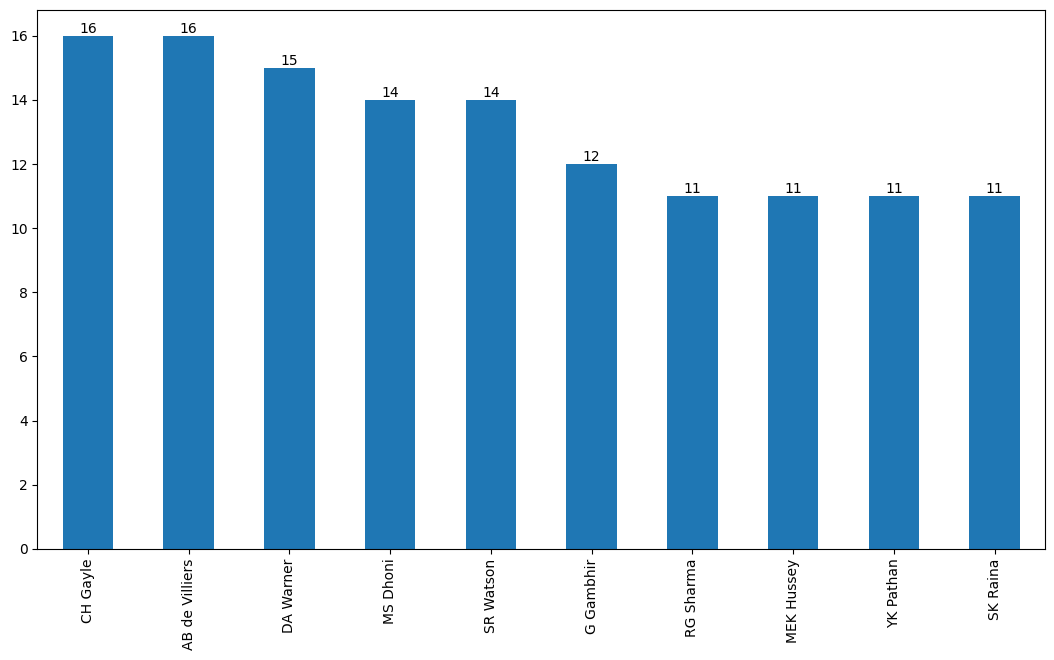

In [ ]:
plt.figure(figsize=(13,7))
a = match['player_of_match'].value_counts().nlargest(10).plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 9 -

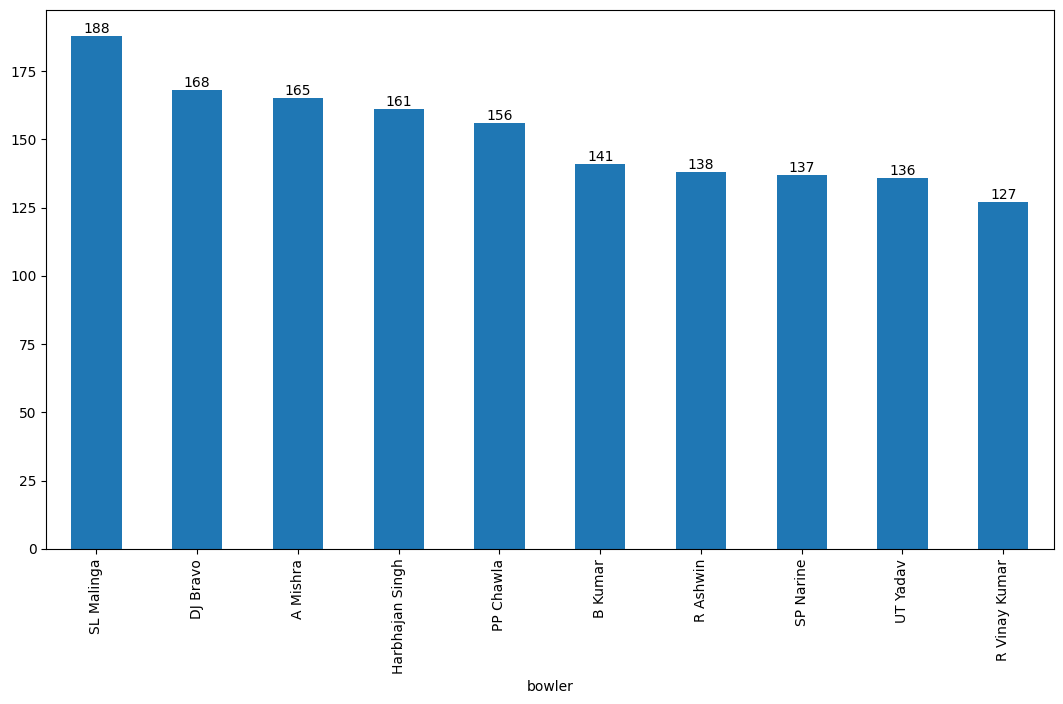

In [ ]:
plt.figure(figsize=(13,7))
a = delivery.groupby('bowler')['player_dismissed'].count().nlargest(10).plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 10 -

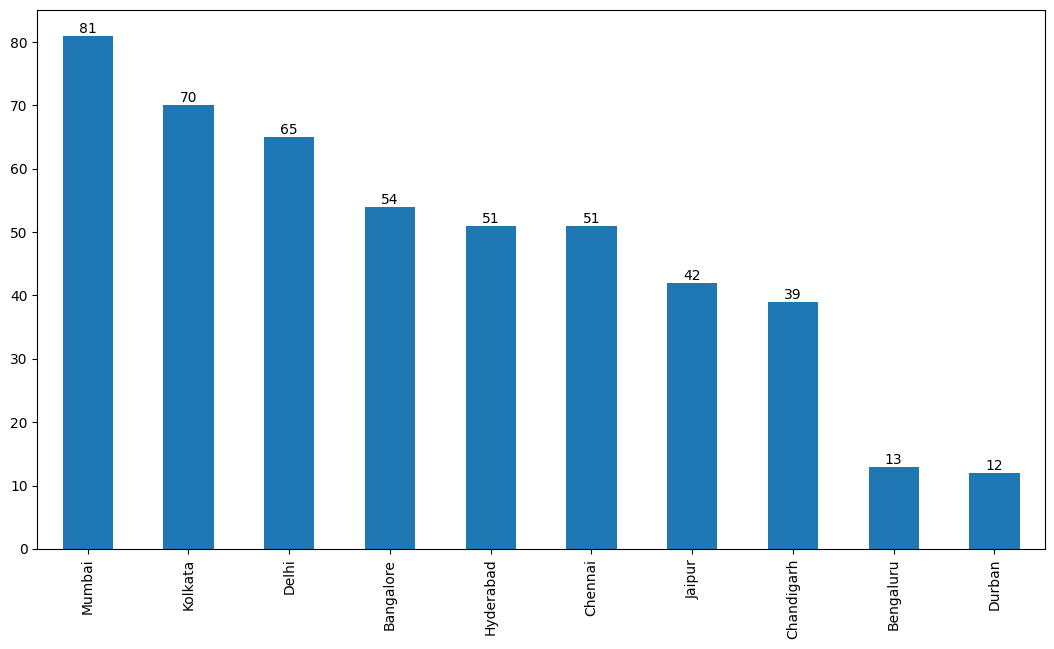

In [ ]:
plt.figure(figsize=(13,7))
a = match['city'].value_counts().head(10).plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 11 -

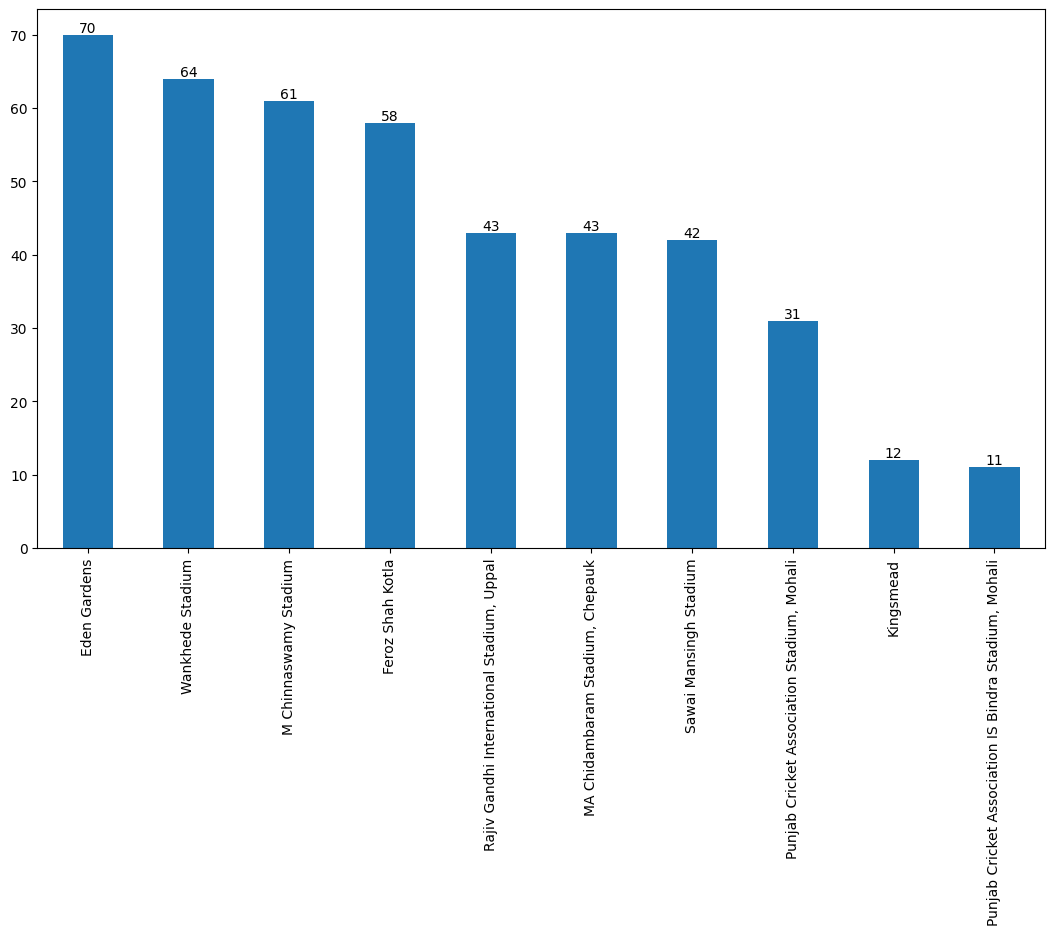

In [ ]:
plt.figure(figsize=(13,7))
a = match['venue'].value_counts().head(10).plot(kind='bar')

for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

#### Chart - 12 -

In [ ]:
# match_df['venue'].value_counts().head(20).index

ven = ['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Kingsmead',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Sardar Patel Stadium, Motera', 'Brabourne Stadium', 'SuperSport Park',
       'Maharashtra Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Rajiv Gandhi Intl. Cricket Stadium', 'M. A. Chidambaram Stadium',
       'Feroz Shah Kotla Ground', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium']

plot2 = match[match['venue'].isin(ven)]

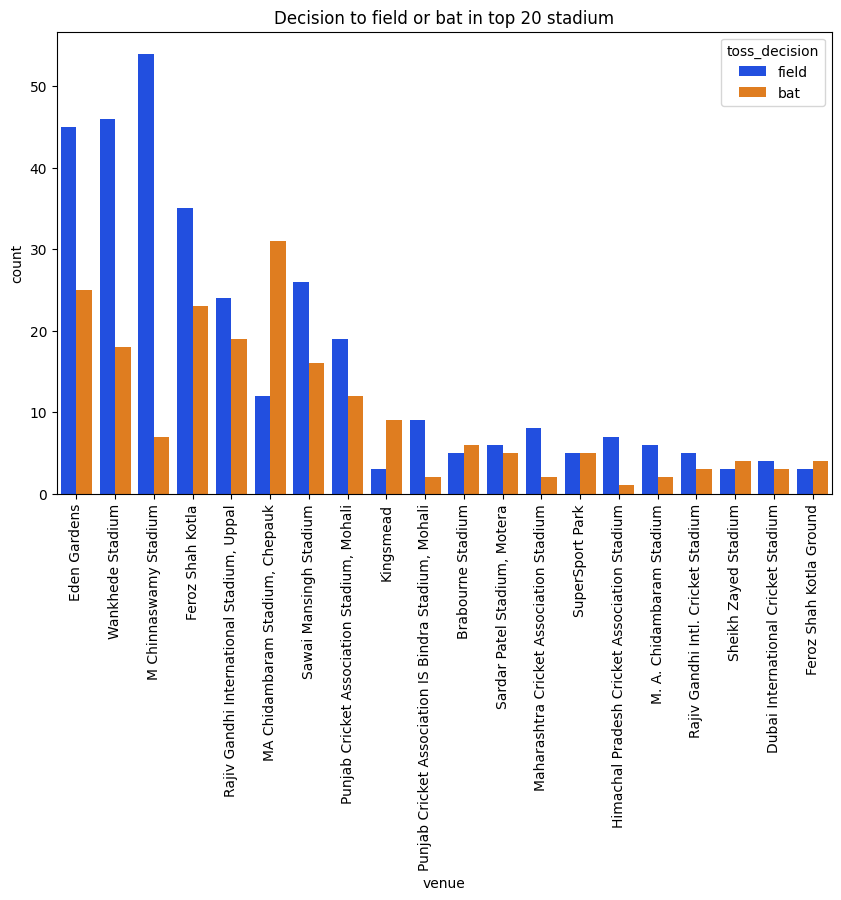

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot(data=plot2, x='venue', hue='toss_decision', palette=sns.color_palette('bright'),order=plot2['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Decision to field or bat in top 20 stadium")
plt.show()

##### 1. Why did you pick the specific chart?

#### Chart - 13 -

<function matplotlib.pyplot.show(close=None, block=None)>

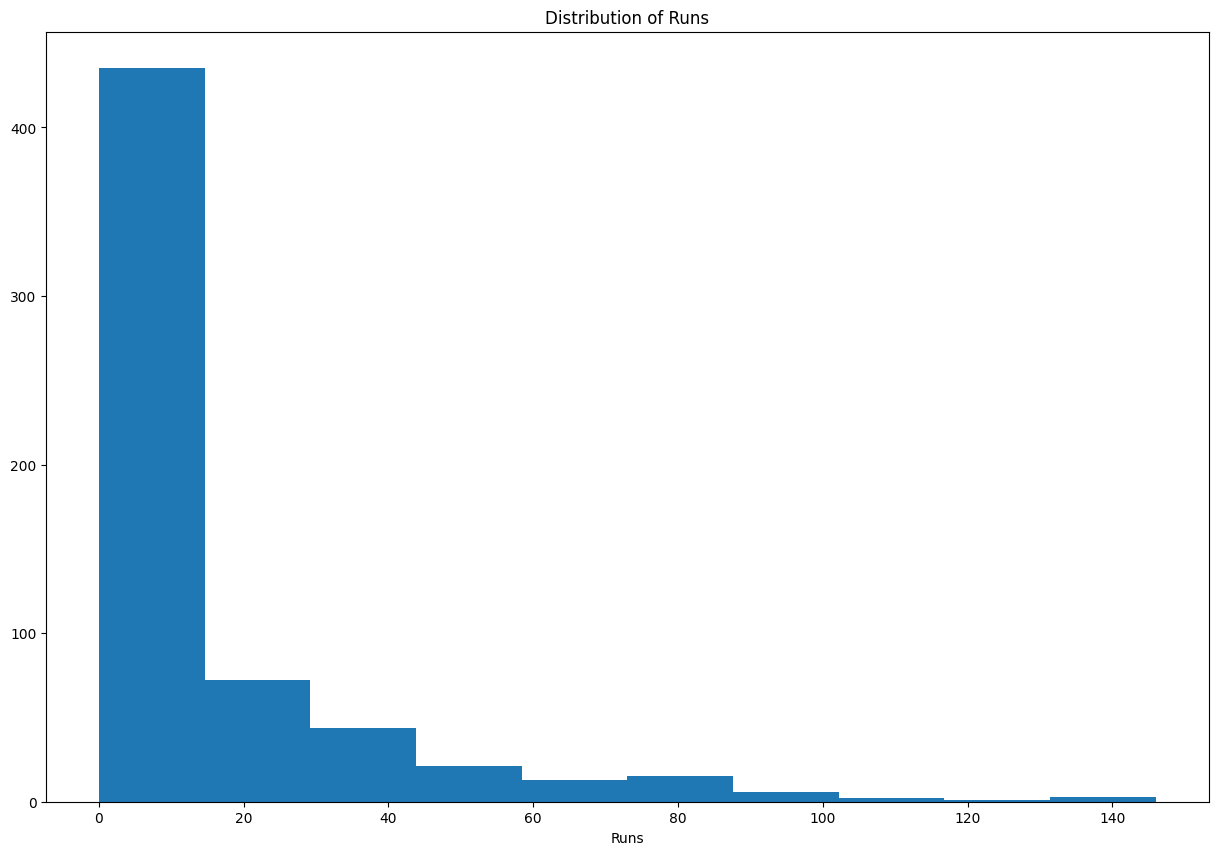

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(match["win_by_runs"])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show

##### 1. Why did you pick the specific chart?

#### Chart - 14 -

In [ ]:
plot1 = match[match["win_by_wickets"] != 0]

<function matplotlib.pyplot.show(close=None, block=None)>

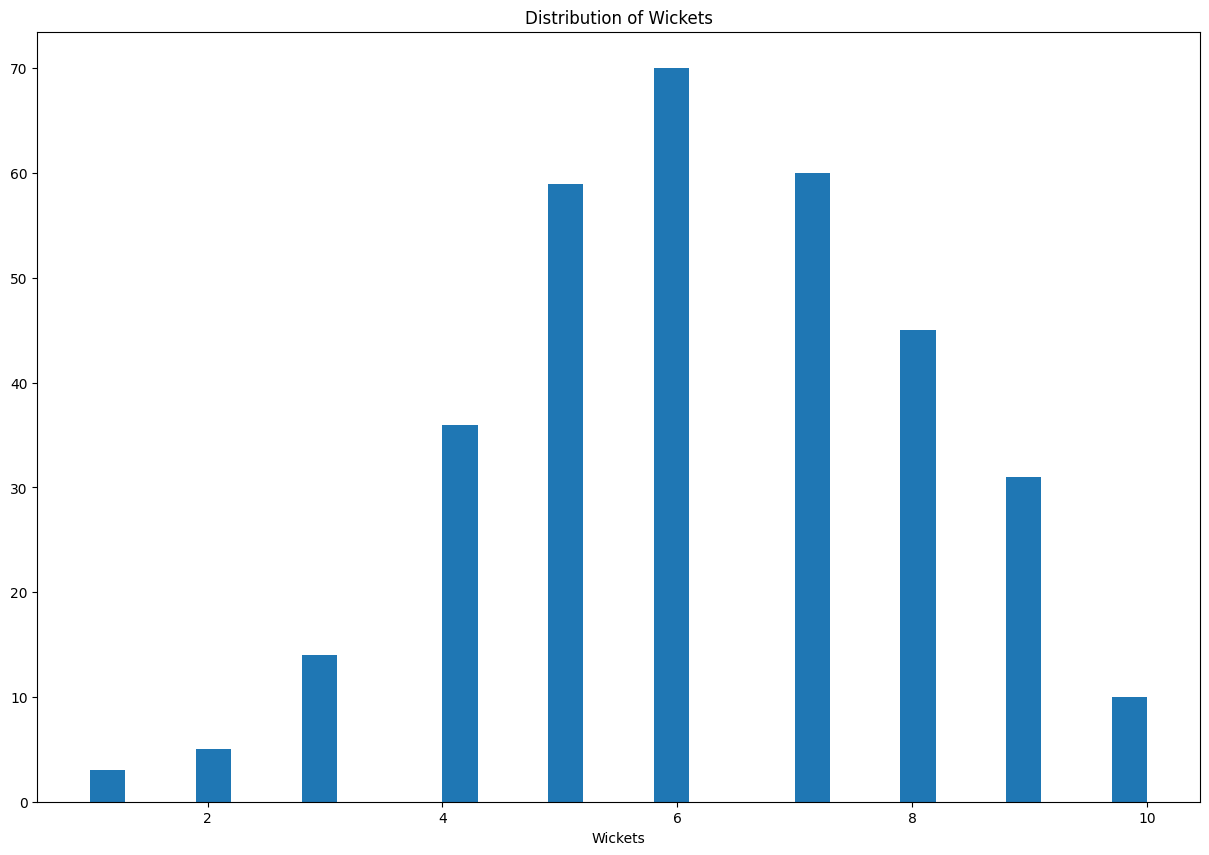

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(plot1["win_by_wickets"],bins=30)
plt.title("Distribution of Wickets")
plt.xlabel("Wickets")
plt.show

##### 1. Why did you pick the specific chart?

## ***5. Feature Engineering & Data Pre-processing***

### 1. Data Transformation

In [ ]:
delivery_df = df1
match_df = df2

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
total_score = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score = total_score[total_score['inning']==1]
total_score

<ipython-input-55-95c4ef798cdb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df = match_df.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans'
]

In [ ]:
match_df['team1'] = match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].replace('Gujarat Lions','Gujarat Titans')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(667, 19)

In [ ]:
match_df = match_df[match_df['dl_applied']==0]
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,3,183


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

answr here

#### 2. Feature Selection

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df.shape

(155701, 24)

In [ ]:
delivery_df = delivery_df[delivery_df['inning']==2]
delivery_df.shape

(75332, 24)

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155696,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
155697,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
155698,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
155699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left'] = (delivery_df['total_runs_x'] + 1) - delivery_df['current_score']
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207


In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-70-0f90143dec02>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6 )/ (120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6 )/ delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


#### 2. Feature Selection

In [ ]:
df = delivery_df[['batting_team','bowling_team','city','current_score','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
df = df.sample(df.shape[0])
df

,batting_team,bowling_team,city,current_score,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
47951,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,16,115,102,9,130,5.333333,6.764706,1
12704,Chennai Super Kings,Kolkata Knight Riders,Chennai,128,20,28,9,147,8.347826,4.285714,1
44131,Deccan Chargers,Mumbai Indians,Mumbai,68,111,61,7,178,6.915254,10.918033,0
26118,Kolkata Knight Riders,Mumbai Indians,Port Elizabeth,49,139,81,8,187,7.538462,10.296296,0
110035,Delhi Daredevils,Kolkata Knight Riders,Kolkata,37,135,81,10,171,5.692308,10.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
155205,Delhi Capitals,Sunrisers Hyderabad,Visakhapatnam,162,10,8,5,171,8.678571,7.500000,1
72137,Chennai Super Kings,Kolkata Knight Riders,Kolkata,85,74,70,10,158,10.200000,6.342857,1
79484,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,97,27,24,6,123,6.062500,6.750000,1
146616,Kings XI Punjab,Sunrisers Hyderabad,Mohali,2,157,117,10,158,4.000000,8.051282,1


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### . Handling Missing Values

In [ ]:
df.isna().sum()

batting_team       0
bowling_team       0
city             832
current_score      0
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr                5
result             0
dtype: int64

In [ ]:
df = df.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

ans here


In [ ]:
df = df[df['balls_left'] != 0]

### 8. Data Splitting

In [ ]:
X = df.iloc[:,:-1]
y = df['result']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.head()

,batting_team,bowling_team,city,current_score,runs_left,balls_left,wickets,total_runs_x,crr,rrr
136763,Kolkata Knight Riders,Mumbai Indians,Kolkata,32,186,96,8,217,8.000000,11.625000
128717,Chennai Super Kings,Kolkata Knight Riders,Chennai,23,185,110,10,207,13.800000,10.090909
4541,Delhi Daredevils,Mumbai Indians,Mumbai,107,36,15,4,142,6.114286,14.400000
124479,Kings XI Punjab,Mumbai Indians,Visakhapatnam,72,53,51,9,124,6.260870,6.235294
62984,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,33,133,66,6,165,3.666667,12.090909


##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set

y_pred = pipe1.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8081610665948421

In [ ]:
pipe1.predict_proba(X_test)[4]

array([0.68668119, 0.31331881])

In [ ]:
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
# Make predictions on the test set

y_pred = pipe2.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9984512827419029

In [ ]:
pipe2.predict_proba(X_test)[4]

array([0.98, 0.02])

# after scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
trf = ColumnTransformer([
    ('step1', StandardScaler(), ['current_score', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']),
    ('step2',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
# Train a logistic regression scaled model

pipe_scal1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe_scal1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal1.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8083630731937244

In [ ]:
pipe_scal1.predict_proba(X_test)[4]

array([0.68580478, 0.31419522])

In [ ]:
# Train a logistic regression scaled model

pipe_scal2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

pipe_scal2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal2.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.998922631472628

In [ ]:
pipe_scal2.predict_proba(X_test)[4]

array([0.99, 0.01])

# Apply multiple model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# classifiers = [
#     LogisticRegression(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     SVC(),
#     KNeighborsClassifier(),
#     GradientBoostingClassifier()
# ]


In [ ]:
# Train a logistic regression scaled model

pipe_scal3 = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

pipe_scal3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal3.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9862635512760084

In [ ]:
pipe_scal3.predict_proba(X_test)[4]

array([1., 0.])

In [ ]:
# Train a logistic regression scaled model

pipe_scal4 = Pipeline(steps=[
    ('step1',trf),
    ('step2',KNeighborsClassifier())
])

pipe_scal4.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', KNeighborsClassifier())])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal4.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9917177294458286

In [ ]:
pipe_scal4.predict_proba(X_test)[4]

array([1., 0.])

In [ ]:
# Train a logistic regression scaled model

pipe_scal5 = Pipeline(steps=[
    ('step1',trf),
    ('step2',GradientBoostingClassifier())
])

pipe_scal5.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', GradientBoostingClassifier())])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal5.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.8375193589657263

In [ ]:
pipe_scal5.predict_proba(X_test)[4]

array([0.57614409, 0.42385591])

In [ ]:
# Train a logistic regression scaled model

pipe_scal6 = Pipeline(steps=[
    ('step1',trf),
    ('step2',SVC())
])

pipe_scal6.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1', StandardScaler(),
                                                  ['current_score', 'runs_left',
                                                   'balls_left', 'wickets',
                                                   'total_runs_x', 'crr',
                                                   'rrr']),
                                                 ('step2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', SVC())])

In [ ]:
# Make predictions on the test set

y_pred = pipe_scal6.predict(X_test)

# Evaluate the model's accuracy

accuracy_score(y_test,y_pred)

0.9653895360581779

In [ ]:
# import pickle
# pickle.dump(pipe,open('pipe.pkl','wb'))
# pickle.dump(pipe2,open('pipe2.pkl','wb'))

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','current_score','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,5,pipe_scal5)
temp_df

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
595,1,5,0,48.3,51.7
602,2,7,0,48.3,51.7
608,3,8,0,48.3,51.7
614,4,11,0,45.2,54.8
620,5,5,1,46.9,53.1
626,6,6,1,64.7,35.3
632,7,10,0,57.4,42.6
638,8,10,1,56.7,43.3
646,9,7,0,54.2,45.8
652,10,9,0,45.1,54.9


Text(0.5, 1.0, 'Target-157')

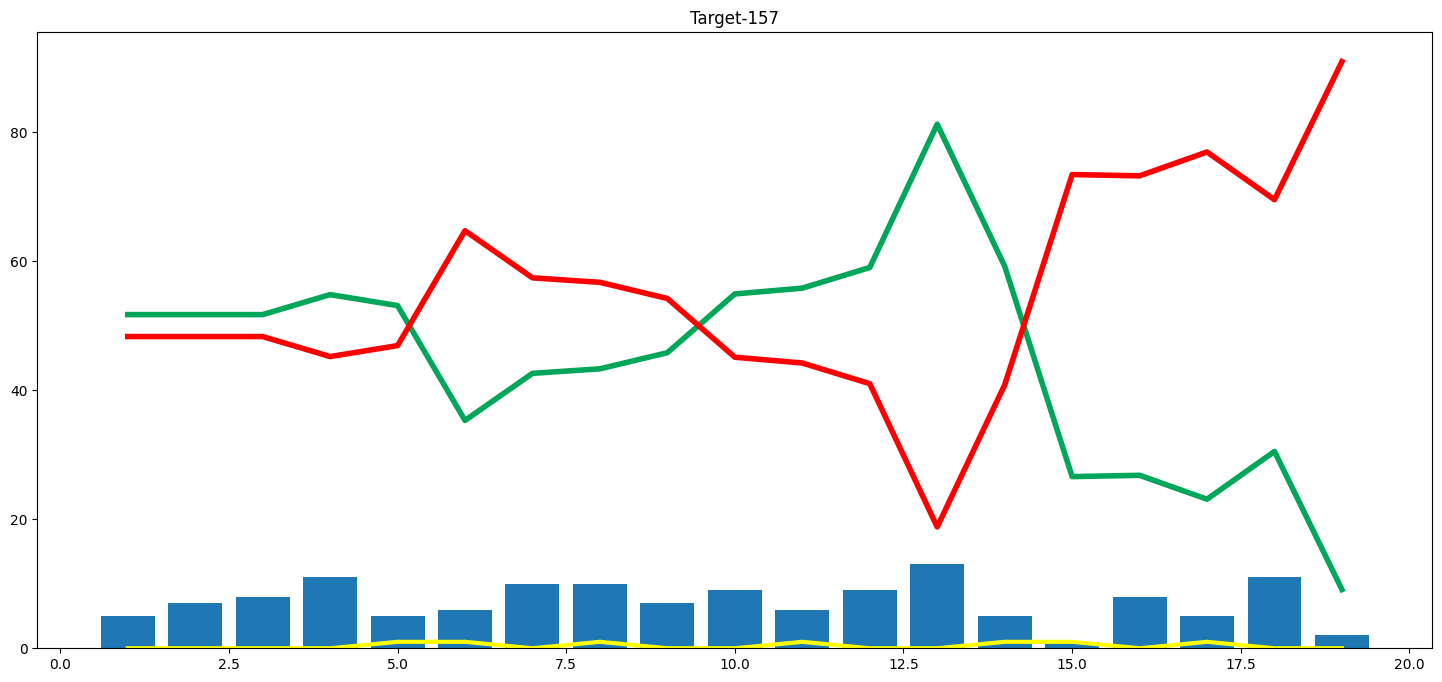

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))